In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/new_retail_data.csv")

In [3]:
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


In [28]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [40]:
df.loc[0]

Transaction_ID                8691788.0
Customer_ID                     37249.0
Name                Michelle Harrington
Email                 Ebony39@gmail.com
Phone                      1414786801.0
Address               3959 Amanda Burgs
City                           Dortmund
State                            Berlin
Zipcode                         77985.0
Country                         Germany
Age                                21.0
Gender                             Male
Income                              Low
Customer_Segment                Regular
Date                          9/18/2023
Year                             2023.0
Month                         September
Time                           22:03:55
Total_Purchases                     3.0
Amount                       108.028757
Total_Amount                  324.08627
Product_Category               Clothing
Product_Brand                      Nike
Product_Type                     Shorts
Feedback                      Excellent


In [5]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [6]:
df["Age"]

0         21.0
1         19.0
2         48.0
3         56.0
4         22.0
          ... 
302005    31.0
302006    35.0
302007    41.0
302008    41.0
302009    28.0
Name: Age, Length: 302010, dtype: float64

In [14]:
df["Age"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
302005    False
302006    False
302007    False
302008    False
302009    False
Name: Age, Length: 302010, dtype: bool

In [8]:
df["Age"].isnull().sum()  # number of null value of Age col

np.int64(173)

In [9]:
df["Product_Category"].isnull().sum()

np.int64(283)

(array([103114.,  38611.,  12831.,  31072.,  13057.,  45739.,  12793.,
         15953.,  13032.,  15635.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

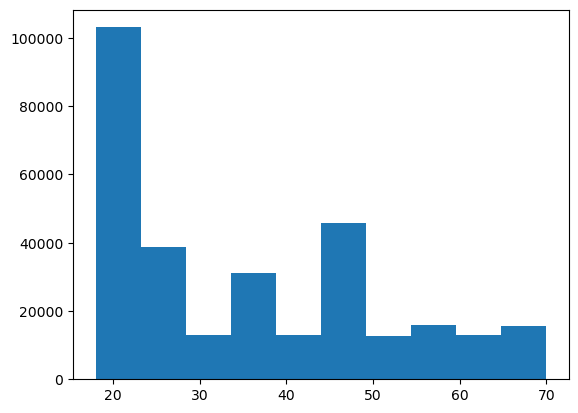

In [10]:
plt.hist(df["Age"])

In [11]:
df["Product_Category"].fillna("").isnull().sum()

np.int64(0)

In [29]:
np.unique([1,1,1,2,3,3,3], return_index=True)

(array([1, 2, 3]), array([0, 3, 4]))

In [19]:
Counter(df["Product_Category"].fillna("N/A"))

Counter({'Electronics': 71196,
         'Grocery': 66786,
         'Clothing': 54741,
         'Books': 54622,
         'Home Decor': 54382,
         'N/A': 283})

Text(0.5, 1.0, 'Count of Product_Category')

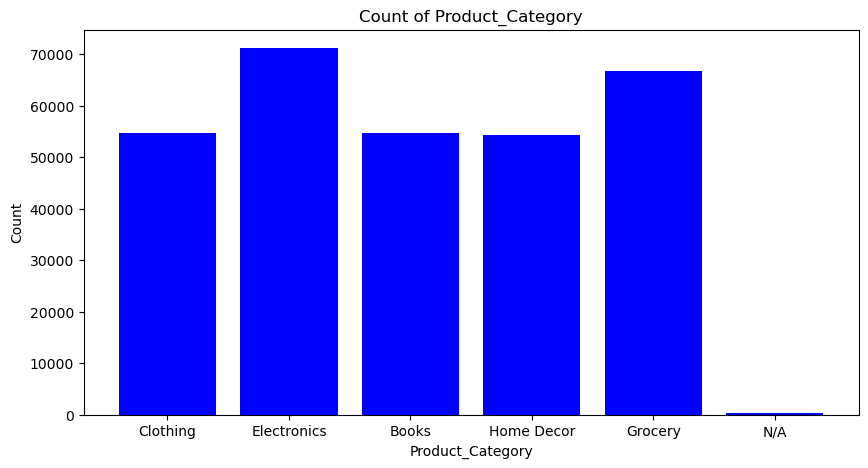

In [27]:
counts = Counter(df["Product_Category"].fillna("N/A"))
labels = list(counts.keys())
counts = list(counts.values())

plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color="blue")
plt.xlabel("Product_Category")
plt.ylabel("Count")
plt.title("Count of Product_Category")

TypeError: 'value' must be an instance of str or bytes, not a int

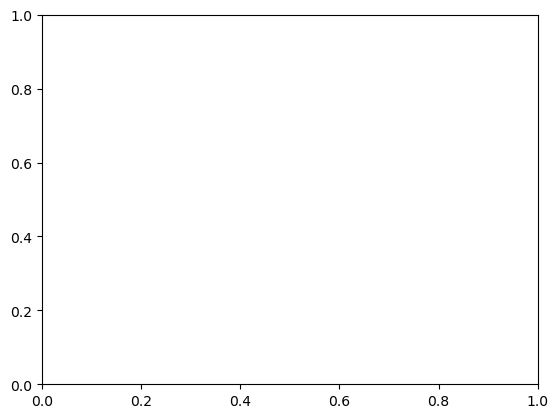

In [35]:
plt.scatter(df["Income"].fillna(0), df["Total_Amount"].fillna(0))